In [1]:
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv('PUIDATA')

'/home/cusp/vmr286/PUIdata'

In [3]:
nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA") + "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
bsize = pd.read_csv(os.getenv("PUIDATA")+"/MN.csv")
#bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/MNMapPLUTO.shp")

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,22,23,25,63,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
bsize.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
0,MN,1,10,101,5.0,1018.0,2.0,1.0,10004.0,E007,...,190225.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1,16V2
1,MN,1,101,101,1.0,1001.0,2.0,1.0,10004.0,E007,...,190636.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1,16V2
2,MN,1,201,101,1.0,1000.0,2.0,1.0,10004.0,E007,...,193648.0,12b,NaN,199 999,10101.0,NaN,0.0,NaN,1,16V2
3,MN,1,301,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,12b,NaN,199 999,10101.0,NaN,0.0,NaN,4,16V2
4,MN,1,401,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,12b,NaN,1 99 999,10101.0,NaN,0.0,NaN,4,16V2


In [5]:
nrg.columns

Index([u'BBL', u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Postcode',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings',
       u'Latitude', u'Longitude', u'Community Board', u'Council District',
       u'Census Tract', u'BIN', u'NTA'],
      dtype=

In [6]:
bsize.columns

Index([u'Borough', u'Block', u'Lot', u'CD', u'CT2010', u'CB2010',
       u'SchoolDist', u'Council', u'ZipCode', u'FireComp', u'PolicePrct',
       u'HealthArea', u'SanitBoro', u'SanitDistrict', u'SanitSub', u'Address',
       u'ZoneDist1', u'ZoneDist2', u'ZoneDist3', u'ZoneDist4', u'Overlay1',
       u'Overlay2', u'SPDist1', u'SPDist2', u'SPDist3', u'LtdHeight',
       u'SplitZone', u'BldgClass', u'LandUse', u'Easements', u'OwnerType',
       u'OwnerName', u'LotArea', u'BldgArea', u'ComArea', u'ResArea',
       u'OfficeArea', u'RetailArea', u'GarageArea', u'StrgeArea',
       u'FactryArea', u'OtherArea', u'AreaSource', u'NumBldgs', u'NumFloors',
       u'UnitsRes', u'UnitsTotal', u'LotFront', u'LotDepth', u'BldgFront',
       u'BldgDepth', u'Ext', u'ProxCode', u'IrrLotCode', u'LotType',
       u'BsmtCode', u'AssessLand', u'AssessTot', u'ExemptLand', u'ExemptTot',
       u'YearBuilt', u'YearAlter1', u'YearAlter2', u'HistDist', u'Landmark',
       u'BuiltFAR', u'ResidFAR', u'CommFAR', u'

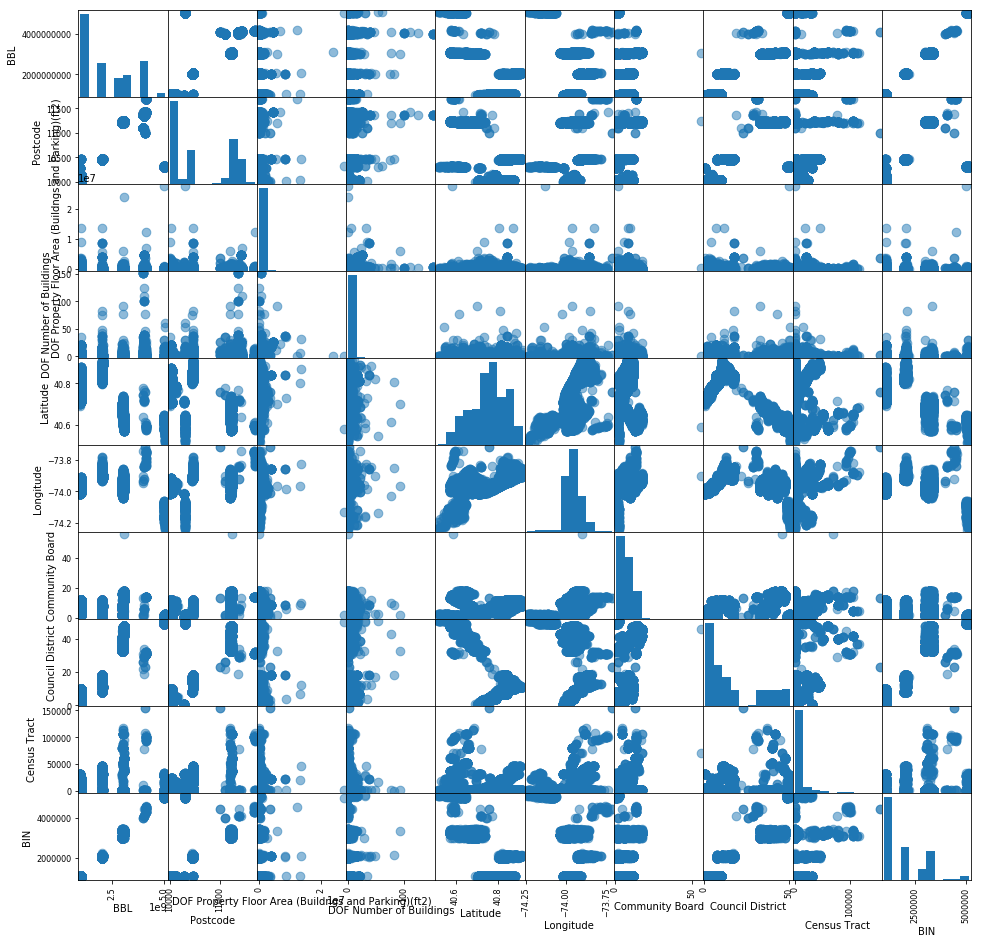

In [7]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16));

In [8]:
# use pd.to_numeric to convert strings to numeric values, 
##check that your conversion worked: e.g.
def convert(x):
    x = pd.to_numeric(x, errors='coerce')
    return x

nrg = nrg.apply(convert)
#print (nrg['Site EUI(kBtu/ft2)'].astype(float))
#[...] do this for all columns you care about in both datasets. 
#Nan's are ok, but you must not get an error when you try the conversion
#the Pluto data is much better at not using spurious entries for numerical value columns. 
#but check you can use the columns you want
bsize = bsize.apply(convert)
#bsize.BBL.astype(float)
#this should not return an error
#notice I can use the attribute notation to refer to columns in bsize, 
#cause the column names do not have spaces!

In [9]:
nrg.columns

Index([u'BBL', u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Postcode',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings',
       u'Latitude', u'Longitude', u'Community Board', u'Council District',
       u'Census Tract', u'BIN', u'NTA'],
      dtype=

In [10]:
#nrg = nrg[['BBL', 'Reported Property Floor Area (Building(s)) (ft²)', 'Site EUI(kBtu/ft2)', 'DOF Number of Buildings',
#          'DOF Property Floor Area (Buildngs and Parking)(ft2)', 'Postcode']]


nrg = nrg[['BBL', 'Site EUI(kBtu/ft2)', 'Reported Property Floor Area (Building(s)) (ft²)']]

In [11]:
bsize.drop(['APPBBL', 'APPDate', 'Address','AreaSource', 'AssessLand', 'AssessTot', 'BldgArea', 'BldgClass',
            'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
            'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
            'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand', 'ExemptTot',
            'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea', 'HealthArea',
            'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot', 'LotArea', 'LotDepth',
            'LotFront', 'LotType', 'LtdHeight', 'NumBldgs', 'NumFloors',
            'OfficeArea', 'OtherArea', 'Overlay1', 'Overlay2', 'OwnerName', 'OwnerType',
            'PLUTOMapID', 'PolicePrct', 'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea',
            'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro',
            'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
            'Tract2010', 'Version', 'XCoord', 'YCoord', 'YearAlter1', 'YearAlter2',
            'ZMCode', 'ZipCode', 'ZoneDist1', 'ZoneDist2',
            'ZoneDist3', 'ZoneDist4', 'ZoneMap', 'SPDist3', 'SanitDistrict',], axis=1, inplace=True) 

In [12]:
bsize.columns

Index([u'UnitsRes', u'UnitsTotal', u'YearBuilt', u'BBL'], dtype='object')

In [13]:
bblnrgdata = pd.merge(nrg, bsize, on="BBL").dropna()
bblnrgdata.shape

(5085, 6)

In [14]:
bblnrgdata.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal,YearBuilt
2,1.013110e+09,125.4,330000.0,0,56,1977
10,1.010140e+09,154.9,841709.0,0,2,1999
15,1.007660e+09,122.3,59468.0,0,8,1912
16,1.008150e+09,117.0,364000.0,0,24,1954
18,1.005050e+09,82.1,235370.0,0,24,1926


In [15]:
bblnrgdata =bblnrgdata.rename(columns={'Site EUI(kBtu/ft2)': 'EUI', 
                                       'Reported Property Floor Area (Building(s)) (ft²)':'Floor_Area'})


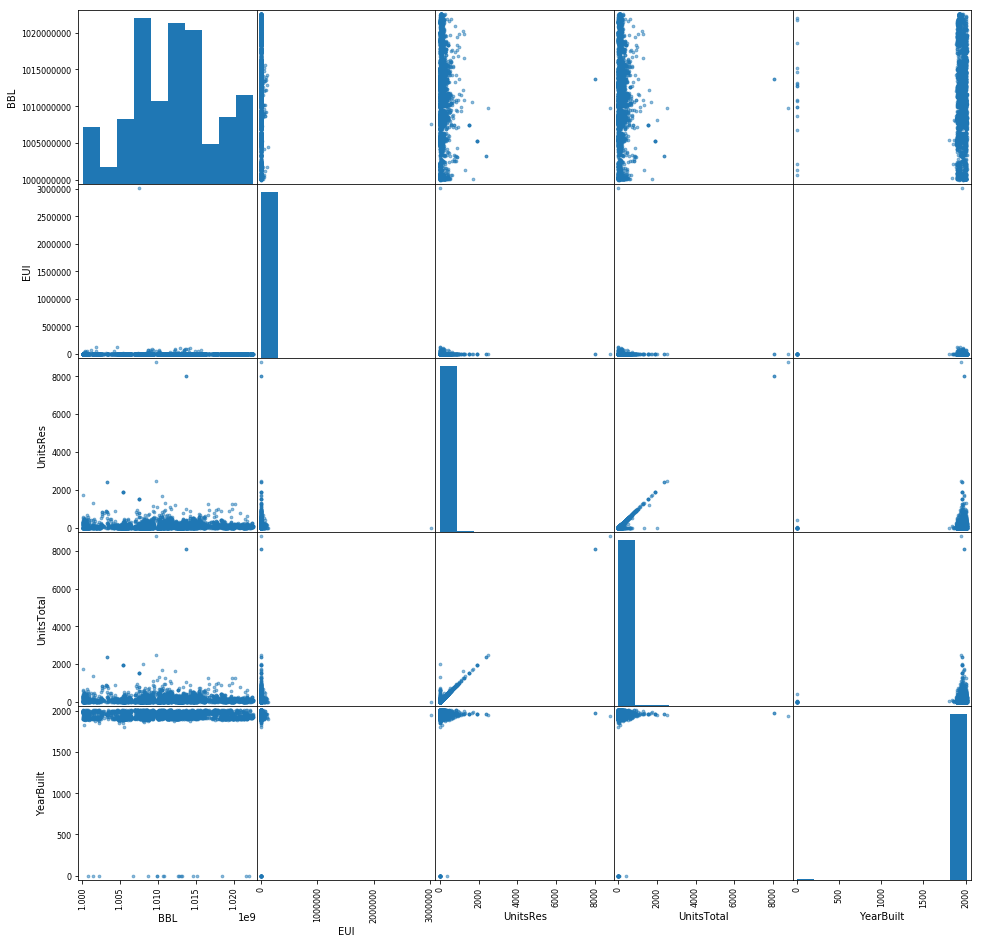

In [16]:
scatter_matrix (bblnrgdata[['BBL','EUI','UnitsRes','UnitsTotal', 'YearBuilt']], s=30, figsize=(16, 16));

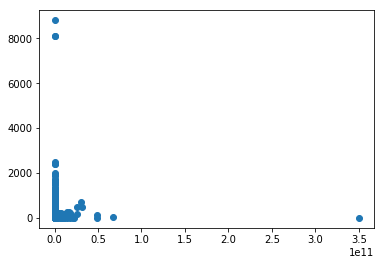

In [17]:
pl.scatter(bblnrgdata.EUI*bblnrgdata.Floor_Area, bblnrgdata.UnitsTotal)

In [18]:
bblnrgdata['EnergyTotal'] = bblnrgdata.EUI*bblnrgdata.Floor_Area

(0, 1000)

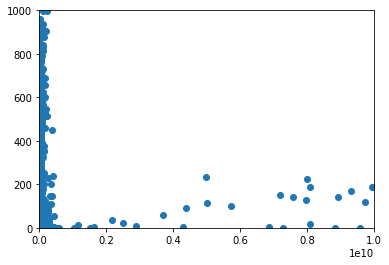

In [19]:
plt.scatter(bblnrgdata.EnergyTotal, bblnrgdata.UnitsTotal)
plt.xlim(0,10**10)
plt.ylim(0, 1000)

In [20]:
bblnrgdataCut = bblnrgdata[(bblnrgdata.EnergyTotal > 1000) * (bblnrgdata.UnitsTotal>=10) * 
                           (bblnrgdata.UnitsTotal<1000)]

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [21]:
import statsmodels.api as sm
X = sm.add_constant(np.log10(bblnrgdataCut.UnitsTotal))
linmodel = sm.OLS(np.log10(bblnrgdataCut.EnergyTotal), X, missing='drop').fit()

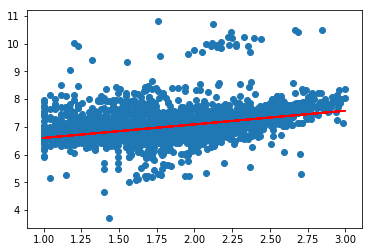

In [22]:
plt.scatter(np.log10(bblnrgdataCut.UnitsTotal), np.log10(bblnrgdataCut.EnergyTotal))
plt.plot(np.log10(bblnrgdataCut.UnitsTotal), linmodel.predict(X), '-', c='r')

In [23]:
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            EnergyTotal   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     827.0
Date:                Mon, 04 Dec 2017   Prob (F-statistic):          1.93e-166
Time:                        03:47:04   Log-Likelihood:                -2605.2
No. Observations:                4285   AIC:                             5214.
Df Residuals:                    4283   BIC:                             5227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.1089      0.033    186.025      0.000         6.045     6.173
UnitsTotal     0.4904      0.017     28.758      0.000         0.457     0.524
==============================================================================
Omnibus:                     2272.854   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43917.184
Skew:                           2.095   Prob(JB):                         0.00
Kurtosis:                      18.114   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
X = sm.add_constant(np.log10(bblnrgdataCut.EnergyTotal))
linmodel2= sm.OLS(np.log10(bblnrgdataCut.UnitsTotal), X, missing='drop').fit()
linmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     827.0
Date:                Mon, 04 Dec 2017   Prob (F-statistic):          1.93e-166
Time:                        03:47:04   Log-Likelihood:                -1756.8
No. Observations:                4285   AIC:                             3518.
Df Residuals:                    4283   BIC:                             3530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const          -0.4369      0.081     -5.400      0.000        -0.596    -0.278
EnergyTotal     0.3300      0.011     28.758      0.000         0.308     0.353
==============================================================================
Omnibus:                      144.802   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.337
Skew:                          -0.457   Prob(JB):                     2.51e-35
Kurtosis:                       3.241   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

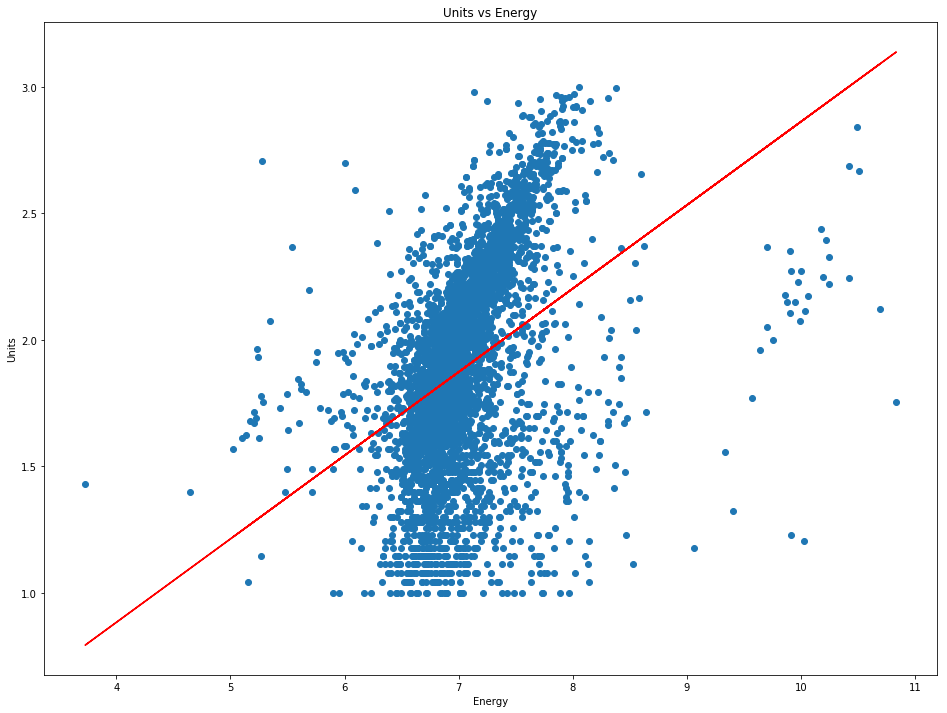

In [25]:
fig = figure(figsize=(16,12))
plt.scatter(np.log10(bblnrgdataCut.EnergyTotal), np.log10(bblnrgdataCut.UnitsTotal))
plt.plot(np.log10(bblnrgdataCut.EnergyTotal), linmodel2.predict(X), '-', c='r')
plt.xlabel('Energy')
plt.ylabel('Units')
plt.title('Units vs Energy')

In [26]:
def chi2(data, model, errors = None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    if errors is None:
        errors = np.ones_like(data)
    if data.shape == model.shape and data.shape == errors.shape:
        return (((data - model)**2) / errors**2).sum()
    else: 
        print ('''ERROR:must pass arrays of identical dimension for data, model and (optional) error)''')
        return -1

In [27]:
## Assume that there is error in the reported energy. 
## but that is the product of two measured qusntities, each of which will have errors. 
## The minimum error is the squareroot of the value

#Below I am writing out some uncertainties - please explain the functional form that I used.
#errors on the measured quantities
errorsnrg = np.sqrt((bblnrgdataCut.Floor_Area)**2 +\
                (bblnrgdataCut.EUI**2))

## Assume count statistics in the number of units as well
errorsunits = np.sqrt(bblnrgdataCut.UnitsTotal)

#These errors need to be propagated properly through the log

Since there are possible errors in both the floor area and the reported energy the errors of both are added together. <br>
The reason the reported values are squared is to overestimate the error to make a more cautious estimate of the chisquare

In [28]:
errorsInLogNrg = np.abs(errorsnrg / bblnrgdataCut.EnergyTotal / np.log(10))
errorsInLogUnits = np.abs(errorsunits / bblnrgdataCut.UnitsTotal / np.log(10))

bblnrgdataCut['errorsnrg'] = errorsInLogNrg
bblnrgdataCut['errorsunits'] = errorsInLogUnits

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
print chi2(np.log10(bblnrgdataCut.EnergyTotal), linmodel.predict(), bblnrgdataCut.errorsnrg)
print chi2(np.log10(bblnrgdataCut.UnitsTotal), linmodel2.predict(), bblnrgdataCut.errorsunits)

3.56979723055e+12
491759.260372


In [30]:
import statsmodels.formula.api as smf

In [31]:
mydf = np.log10(bblnrgdataCut[['EnergyTotal', 'UnitsTotal']])

In [32]:
#sdf_ = bblnrgdataCut.sort_values(by='EnergyTotal')
#qX = sdf_[['EnergyTotal', 'Energy2']]
#qX = sm.add_constant(np.log10(qX))
#qmodel = sm.OLS(np.log10(sdf_.UnitsTotal), qX, missing='drop').fit()


In [33]:
sdf_ = mydf.sort_values(by='EnergyTotal')
qmodel = smf.ols('UnitsTotal ~ I(EnergyTotal**2) + EnergyTotal', data=sdf_).fit()

In [34]:
qmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     475.0
Date:                Mon, 04 Dec 2017   Prob (F-statistic):          4.74e-187
Time:                        03:47:05   Log-Likelihood:                -1705.7
No. Observations:                4285   AIC:                             3417.
Df Residuals:                    4282   BIC:                             3437.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              -4.4298      0.401    -11.050      0.000        -5.216    -3.644
I(EnergyTotal ** 2)    -0.0725      0.007    -10.164      0.000        -0.086    -0.059
EnergyTotal             1.4101      0.107     13.195      0.000         1.201     1.620
==============================================================================
Omnibus:                      111.864   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.219
Skew:                          -0.378   Prob(JB):                     1.75e-27
Kurtosis:                       3.346   Cond. No.                     3.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

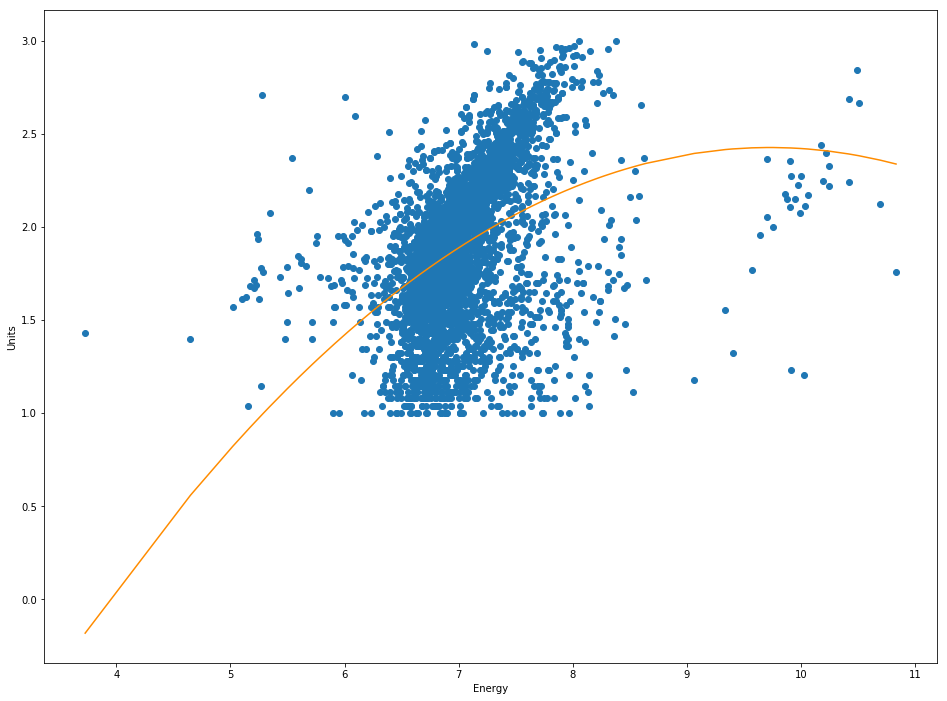

In [35]:
fig = plt.figure(figsize=(16,12))

plt.scatter(mydf.EnergyTotal, mydf.UnitsTotal)

plt.plot(sdf_.EnergyTotal, qmodel.predict(sdf_),'-', c='DarkOrange')
plt.xlabel('Energy')
plt.ylabel('Units')

In [36]:
qmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     475.0
Date:                Mon, 04 Dec 2017   Prob (F-statistic):          4.74e-187
Time:                        03:47:06   Log-Likelihood:                -1705.7
No. Observations:                4285   AIC:                             3417.
Df Residuals:                    4282   BIC:                             3437.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              -4.4298      0.401    -11.050      0.000        -5.216    -3.644
I(EnergyTotal ** 2)    -0.0725      0.007    -10.164      0.000        -0.086    -0.059
EnergyTotal             1.4101      0.107     13.195      0.000         1.201     1.620
==============================================================================
Omnibus:                      111.864   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.219
Skew:                          -0.378   Prob(JB):                     1.75e-27
Kurtosis:                       3.346   Cond. No.                     3.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
linmodel2.llf

-1756.8197707570366

In [38]:
qmodel.llf

-1705.7421479356758

In [39]:
#import numpy.polynomial.polynomial as poly
#fig = plt.figure(figsize=(10,8))
#x_new = np.linspace(1, 3, 100)
#coefs = poly.polyfit(np.log10(bblnrgdataCut.UnitsTotal), np.log10(bblnrgdataCut.EnergyTotal), 2)
#ffit = poly.polyval(x_new, coefs)
#plt.scatter(np.log10(bblnrgdataCut.UnitsTotal), np.log10(bblnrgdataCut.EnergyTotal))
#plt.plot(x_new, ffit, c='r')

In [40]:
print(2 * (qmodel.llf - (linmodel2.llf)))

102.155245643


In [41]:
qmodel.compare_lr_test(linmodel2)

(102.15524564272164, 5.1336706861918249e-24, 1.0)

Since the pvalue is below .05 we reject the null hypothesis that the models are equal and accept the second model

GRade: 10/10